In [3]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Ler CSV
metricas = pd.read_csv('metricas.csv', sep = ',', decimal = '.')

In [5]:
# Visualizar os últimos 5 registros para entendimento da estrutura do arquivo
metricas.tail()

,chat_number,text_sent_by_user
279,35,homem de ferro
280,35,Quero conhecer sua história
281,35,Quero uma foto dele
282,35,tchau
283,35,5-Excelente


In [6]:
# Lista de total de palavras por mensagem enviada por usuário
total_words = []
# Lista com todas as palavras enviadas em todas as mensagens de todos usuários
all_words = []

# Popular as listas acima
for text in metricas.text_sent_by_user:
    total_words.append(len(text.split()))

    words = text.split()
    for word in words:
        all_words.append(word.lower())

# Adicionar coluna com total de palavras da mensagem enviada pelo usuário
metricas['total_words'] = total_words

In [7]:
metricas.tail()

,chat_number,text_sent_by_user,total_words
279,35,homem de ferro,3
280,35,Quero conhecer sua história,4
281,35,Quero uma foto dele,4
282,35,tchau,1
283,35,5-Excelente,1


In [8]:
# Total de chats
total_chats = len(metricas.chat_number.unique())
print(total_chats)

35


In [9]:
# Total de mensagens enviadas
total_texts_sent = len(metricas.chat_number)
print(total_texts_sent)

284


In [10]:
# Total de palavras enviadas
total_words_sent = len(all_words)
print(total_words_sent)

601


In [11]:
# Média de mensagens enviadas por chat
average_texts_sent = total_texts_sent / total_chats
print(average_texts_sent)

8.114285714285714


In [12]:
# Média de palavras enviadas por mensagem
average_words_sent_per_text = total_words_sent / total_texts_sent
print(average_words_sent_per_text)

2.1161971830985915


In [13]:
# Média de palavras enviadas por chat
average_words_sent_per_chat = total_words_sent / total_chats
print(average_words_sent_per_chat)

17.17142857142857


In [14]:
# Geração de um novo dataframe com base no total de mensagens envidas por usuário por chat
total_texts_sent_per_chat = metricas.groupby('chat_number')['text_sent_by_user'].nunique()

list_total_texts_sent_per_chat = []

chat = 1;
for total in total_texts_sent_per_chat:
    list_total_texts_sent_per_chat.append({'chat_number': chat, 'total_texts_sent_by_user': total})
    chat = chat + 1

df_list_total_texts_sent_per_chat = pd.DataFrame(list_total_texts_sent_per_chat, columns = ['chat_number', 'total_texts_sent_by_user'])

df_list_total_texts_sent_per_chat.tail()

,chat_number,total_texts_sent_by_user
30,31,9
31,32,8
32,33,8
33,34,9
34,35,8


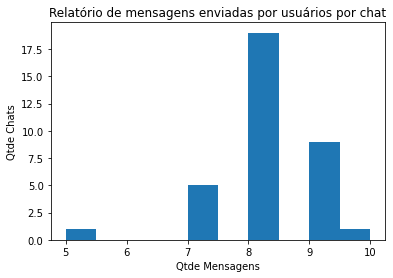

In [15]:
plt.hist(df_list_total_texts_sent_per_chat.total_texts_sent_by_user)
plt.title('Relatório de mensagens enviadas por usuários por chat')
plt.xlabel('Qtde Mensagens')
plt.ylabel('Qtde Chats')
plt.show()

In [16]:
# Gerar top 10 palavras mais frequentes
counts = dict(Counter(all_words).most_common(10))
labels, values = zip(*counts.items())
indSort = np.argsort(values)[::-1]
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]
indexes = np.arange(len(labels))

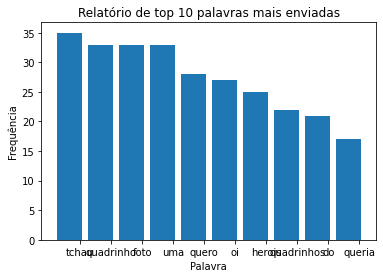

In [17]:
plt.bar(indexes, values)
plt.xticks(indexes + 0.35, labels)
plt.title('Relatório de top 10 palavras mais enviadas')
plt.xlabel('Palavra')
plt.ylabel('Frequência')
plt.show()

In [24]:
# Ler CSV com votações
votes = pd.read_csv('votes.csv', sep = ',', decimal = '.')

# Votação de satisfação
votes.value_counts()

vote       
3-Regular      12
4-Bom          10
5-Excelente     5
2-Ruim          4
1-Pessimo       4
dtype: int64